  #                         Majore Crime Indicators 
  #                               City of Toronto 
  
  
  
  ### This project aims to analyze and visualize crime catagories  in Toronto from 2016-2022. Correlations between crime and various metrics like time and seasons, premises and locations were looked
   
   
   
   
   
   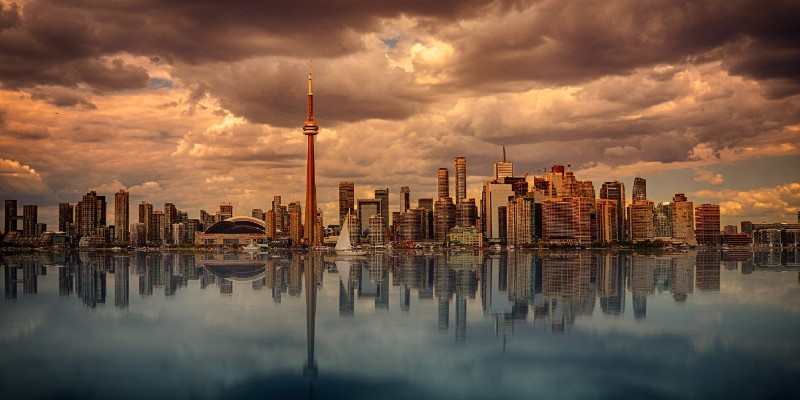 

In [48]:
# Import necessary libraries
import io
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define the file path
file_path = '/Users/biniam/Desktop/Final Pythone Project/major-crime-indicators.csv'

# Load the crime data from the CSV file
crime_data = pd.read_csv(file_path)




## The pie chart above shows the distribution of crime categories in Toronto per 10,000 incidents. 

## Assault is the most common type of crime with 3,667 incidents per 10,000, followed by Theft Over with 888 incidents per 10,000. 

## The other categories are much less common, with Break and Enter having the lowest count at only 137 incidents per 10,000.

In [49]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio



# Define the file path
file_path = '/Users/biniam/Desktop/Final Pythone Project/major-crime-indicators.csv'

# Load the crime data from the CSV file
crime_data = pd.read_csv(file_path)

# Calculate the crime counts
crime_counts = crime_data['MCI_CATEGORY'].value_counts()
crime_counts_normalized = (crime_counts / crime_counts.sum()) * 10000

# Create a pie chart with the crime_counts_normalized data
fig = go.Figure(data=[go.Pie(labels=crime_counts_normalized.index, values=crime_counts_normalized.values, hole=.3)])

# Customize the layout
fig.update_layout(
    title="Crime Counts in Toronto per 10,000 Incidents",
    annotations=[dict(text='Crime Types', showarrow=False)],
    showlegend=True
)

# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')


# Show the plot
fig.show()

In [50]:
import pandas as pd

# Define the file path
file_path = '/Users/biniam/Desktop/Final Pythone Project/major-crime-indicators.csv'

# Load the crime data from the CSV file
crime_data = pd.read_csv(file_path)

# Filter the data for the years 2019-2022
crime_data_filtered = crime_data[(crime_data['OCC_YEAR'] >= 2019) & (crime_data['OCC_YEAR'] <= 2022)]

# Calculate the total number of crimes for each year
crime_counts_by_year = crime_data_filtered['OCC_YEAR'].value_counts().sort_index()

print(crime_counts_by_year)

2019.0    40026
2020.0    35065
2021.0    34529
2022.0    40226
Name: OCC_YEAR, dtype: int64


In 2016, there are 33529 criminal crimes occurred in Toronto.
In 2017, there are 35145 criminal crimes occurred in Toronto.
In 2018, there are 37371 criminal crimes occurred in Toronto.
In 2019, there are 40118 criminal crimes occurred in Toronto.
In 2020, there are 35168 criminal crimes occurred in Toronto.
In 2021, there are 35097 criminal crimes occurred in Toronto.
In 2022, there are 41521 criminal crimes occurred in Toronto.


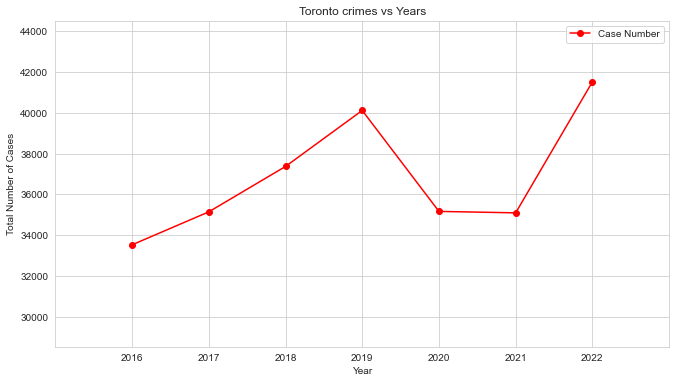

In [51]:

# Define the file path
file_path = '/Users/biniam/Desktop/Final Pythone Project/major-crime-indicators.csv'

# Load the crime data from the CSV file
df = pd.read_csv(file_path)# Filter the data for each year

crime2016 = df[df['REPORT_YEAR'] == 2016]
crime2017 = df[df['REPORT_YEAR'] == 2017]
crime2018 = df[df['REPORT_YEAR'] == 2018]
crime2019 = df[df['REPORT_YEAR'] == 2019]
crime2020 = df[df['REPORT_YEAR'] == 2020]
crime2021 = df[df['REPORT_YEAR'] == 2021]
crime2022 = df[df['REPORT_YEAR'] == 2022]


# Get the total number of crimes occurred in each year
total_num = []
total_num.append(len(crime2016["MCI_CATEGORY"]))
total_num.append(len(crime2017["MCI_CATEGORY"]))
total_num.append(len(crime2018["MCI_CATEGORY"]))
total_num.append(len(crime2019["MCI_CATEGORY"]))
total_num.append(len(crime2020["MCI_CATEGORY"]))
total_num.append(len(crime2021["MCI_CATEGORY"]))
total_num.append(len(crime2022["MCI_CATEGORY"]))

for i in range(0, 7):
    print(f"In {i + 2016}, there are {total_num[i]} criminal crimes occurred in Toronto.")

# Define x and y axes
x_axis = ["2016", "2017", "2018", "2019", "2020", "2021", "2022"]
y_axis = total_num

# Plot line graph and format
plt.figure(figsize=(11, 6))
plt.plot(x_axis, y_axis, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Total Number of Cases")
plt.xlim(-1, len(x_axis))
plt.ylim(min(y_axis) - 5000, max(y_axis) + 3000)
plt.legend(["Case Number"], loc="upper right")
plt.title("Toronto crimes vs Years")

# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')


plt.show()

In [52]:
import plotly.graph_objs as go

# Create a line chart with the crime_counts_by_year data
fig = go.Figure(data=[go.Scatter(x=crime_counts_by_year.index, y=crime_counts_by_year.values, mode='lines+markers')])

# Customize the layout
fig.update_layout(
    title="Total Number of Crimes in Toronto (2019-2022)",
    xaxis_title="Year",
    yaxis_title="Number of Crimes",
    showlegend=False
)

# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')

# Show the plot
fig.show()



# The line chart demonstrates the number of incidents for each crime category during each month intervals.


## The analysis aims to provide insights into trends, patterns, and variations in crime incidents during this period. 

## The findings will be useful for informing public safety strategies, resource allocation, and policy formulation.


# Key Findings

### This indicates that Assault consistently had the highest number of incidents throughout the two-year period.

### Auto Theft also showed an increasing trend, 

### while Break and Enter, Robbery, and Theft Over remained relatively stable.

    

In [53]:
import pandas as pd
import plotly.graph_objs as go

# Read the crime data CSV file and filter for the period of 2021-2022
crime_data = pd.read_csv("major-crime-indicators.csv", parse_dates=["OCC_DATE"])
filtered_crime_data = crime_data[(crime_data["OCC_DATE"].dt.year >= 2021) & (crime_data["OCC_DATE"].dt.year <= 2022)]

# Group the data by crime category and month
crime_counts_monthly = filtered_crime_data.groupby(["MCI_CATEGORY", pd.Grouper(key="OCC_DATE", freq="M")]).size().unstack(level=0)

# Create a line chart for each crime category
fig = go.Figure()
for category in crime_counts_monthly.columns:
    fig.add_trace(go.Scatter(x=crime_counts_monthly.index, y=crime_counts_monthly[category], mode="lines+markers", name=category))

# Customize the layout
fig.update_layout(
    title="Crime Trends by Category (2021-2022)",
    xaxis=dict(title="Month"),
    yaxis=dict(title="Number of Incidents"),
    legend=dict(title="Crime Categories"),
    hovermode="x unified"
)

# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')

# Show the plot
fig.show()


# The line chart demonstrates the number of incidents for each crime category every 2-hour intervals throughout the day. 


# Key findings:

### This reveals that assault incidents peak between 20:00 and 21:00, with a noticeable dip during early morning hours. 

### Break and Enter crimes show a different trend, with the highest number of incidents occurring between 12:00 and 13:00 and the lowest during the early morning hours.

### Auto Theft and Robbery incidents remain relatively steady throughout the day but slightly increase in the late evening hours. 

### Theft Over incidents have a less defined pattern but are more concentrated in the afternoon and evening hours.





In [54]:
import numpy as np
import plotly.graph_objs as go

# Add a new column for 2-hour bins
df['REPORT_2HOUR_INTERVAL'] = (df['REPORT_HOUR'] // 2) * 2

# Group data by 2-hour intervals and category
crime_by_2hour_category = df.groupby(['REPORT_2HOUR_INTERVAL', 'MCI_CATEGORY'])['MCI_CATEGORY'].count().unstack().fillna(0)

# Create an interactive line chart for crime counts by category at different 2-hour intervals of the day
line_chart = go.Figure()

for category in crime_by_2hour_category.columns:
    line_chart.add_trace(go.Scatter(x=crime_by_2hour_category.index, y=crime_by_2hour_category[category], mode='lines+markers', name=category))

line_chart.update_layout(
    title="Crime Counts by Category and 2-Hour Intervals",
    xaxis=dict(title="Hour (2-hour intervals)", tickvals=np.arange(0, 24, 2), ticktext=["0-1", "2-3", "4-5", "6-7", "8-9", "10-11", "12-13", "14-15", "16-17", "18-19", "20-21", "22-23"]),
    yaxis=dict(title="Number of Incidents"),
    legend=dict(title="Crime Category")
)

# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')

# Show the line chart
line_chart.show()


# Crime Rates in Toronto by Neighborhood (2021-2022)

## The data provides insight into the distribution of various crime categories across different neighborhoods in the city. 


# Key Findings:

## The visualization reveals several patterns and trends in crime rates across Toronto

### Certain neighborhoods experience higher overall crime rates compared to others.
    
### The distribution of crime categories is not uniform across the city, with some neighborhoods reporting higher rates of specific types of crime.
    
### Some neighborhoods have a more diverse range of reported crimes, while others exhibit   more concentrated patterns.

In [55]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import json
import requests
from shapely.geometry import shape

# Filter the data between 2021 and 2022
df = df[(df['REPORT_YEAR'] >= 2021) & (df['REPORT_YEAR'] <= 2022)]

# Load the GeoJSON data for Toronto neighborhoods
url = "https://raw.githubusercontent.com/jasonicarter/toronto-geojson/master/toronto_crs84.geojson"
response = requests.get(url)
toronto_geojson = json.loads(response.text)

# Extract centroid coordinates for each neighborhood
neighborhood_coords = []
for feature in toronto_geojson['features']:
    neighborhood_name = feature['properties']['AREA_NAME']
    geom = shape(feature['geometry'])
    centroid = geom.centroid
    neighborhood_coords.append([neighborhood_name, centroid.y, centroid.x])

# Create a DataFrame with the neighborhood coordinates
neighborhood_coords_df = pd.DataFrame(neighborhood_coords, columns=['Neighborhood', 'Latitude', 'Longitude'])

# Group the data by neighborhood and count the incidents
neighborhood_crime_counts = df.groupby(['NEIGHBOURHOOD_140', 'MCI_CATEGORY'])['MCI_CATEGORY'].count().reset_index(name='Crime_Count')

# Merge the neighborhood coordinates with the crime data
df_merged = neighborhood_crime_counts.merge(neighborhood_coords_df, left_on='NEIGHBOURHOOD_140', right_on='Neighborhood')

# Create a scatter plot with different colors for each crime category
fig = px.scatter_mapbox(df_merged,
                        lat='Latitude',
                        lon='Longitude',
                        color='MCI_CATEGORY',
                        size='Crime_Count',
                        text='Neighborhood',
                        hover_name='Neighborhood',
                        hover_data={'Crime_Count': True},
                        color_discrete_sequence=px.colors.qualitative.Pastel,
                        zoom=10,
                        mapbox_style="carto-positron",
                        title='Crime Rates in Toronto by Neighborhood (2021-2022)'
                        )

fig.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0})

# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')


fig.show()


# This interactive bar chart displays the number of crime incidents by property type and crime category. 

## Each bar represents a distinct property type—such as 
        
###  houses, commercial properties, and apartments—while the colors within the bars indicate different crime categories. 

###  By observing the height and color distribution within the bars, you can easily identify and compare the prevalence of various crime types across different property settings. 

### This visualization provides valuable insights into crime patterns and helps in understanding the relationship between criminal activities and property types in the area.


In [56]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Assuming you have a DataFrame named 'df' containing the crime data

# Filter the data by the desired crime categories
crime_categories = ['Assault', 'Break and Enter', 'Auto Theft', 'Robbery', 'Theft Over']
df_filtered = df[df['MCI_CATEGORY'].isin(crime_categories)]

# Group the data by property type and crime category
property_crime_counts = df_filtered.groupby(['PREMISES_TYPE', 'MCI_CATEGORY']).size().reset_index(name='Crime_Count')

fig = px.bar(property_crime_counts,
             x='PREMISES_TYPE',
             y='Crime_Count',
             color='MCI_CATEGORY',
             text='Crime_Count',
             labels={'PREMISES_TYPE': 'Property Type',
                     'Crime_Count': 'Number of Crimes'},
             title='Crimes by Property Type and Category',
             template='plotly_dark')

fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_yaxes(title_text='Number of Crimes')
fig.update_xaxes(title_text='Property Types')
# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')

fig.show()


# An interactive sunburst plot was created to display the number of incidents for each crime category in Toronto neighborhoods, separated by year. 

## The plot is colored based on the number of incidents, with brighter colors representing higher crime counts. The visualization allows for easy identification of crime patterns and trends across neighborhoods and years.


##  Findings:

###  This reveals that some crime categories have higher incident rates than others in Toronto neighborhoods.

###  Certain neighborhoods exhibit consistently high or low crime rates across the years, while others show more variability.

###  The distribution of crime incidents varies between years, indicating potential shifts in crime patterns or the effectiveness of law enforcement efforts.



In [57]:
import plotly.express as px
import pandas as pd

# Filter the data between 2021 and 2022
df = df[(df['REPORT_YEAR'] >= 2021) & (df['REPORT_YEAR'] <= 2022)]

# Group the data by year, neighborhood, and crime category, and count the incidents
year_neighborhood_crime_counts = df.groupby(['REPORT_YEAR', 'NEIGHBOURHOOD_140', 'MCI_CATEGORY']).size().reset_index(name='Crime_Count')

# Rename the columns
year_neighborhood_crime_counts.columns = ['Year', 'Neighborhood', 'Crime_Category', 'Crime_Count']

# Create a sunburst plot
fig = px.sunburst(year_neighborhood_crime_counts, 
                  path=['Year', 'Crime_Category', 'Neighborhood'], 
                  values='Crime_Count', 
                  color='Crime_Count',
                  color_continuous_scale='Viridis',
                  title='Crime Incidents in Toronto Neighborhoods by Category (2021-2022)',
                  )

fig.update_layout(
    margin=dict(t=50, b=20, l=20, r=20),
    coloraxis_colorbar=dict(title="Crime Count"),
    font=dict(size=12),
)


# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')

fig.show()

# The sunburst plot that shows the top 7 most dangerous neighborhoods for every year (2021-2022) with all categories of crime. 


## The plot will display the crime count for each category in the top 7 dangerous neighborhoods.

In [58]:
import plotly.express as px
import pandas as pd

# Filter the data between 2021 and 2022
df = df[(df['REPORT_YEAR'] >= 2021) & (df['REPORT_YEAR'] <= 2022)]

# Group the data by year, neighborhood, and crime category, and count the incidents
year_neighborhood_crime_counts = df.groupby(['REPORT_YEAR', 'NEIGHBOURHOOD_140', 'MCI_CATEGORY']).size().reset_index(name='Crime_Count')

# Rename the columns
year_neighborhood_crime_counts.columns = ['Year', 'Neighborhood', 'Crime_Category', 'Crime_Count']

# Calculate the total crime count per neighborhood and year
year_neighborhood_total_crime_counts = year_neighborhood_crime_counts.groupby(['Year', 'Neighborhood'])['Crime_Count'].sum().reset_index()

# Find the top 7 dangerous neighborhoods for each year
top_neighborhoods = year_neighborhood_total_crime_counts.groupby('Year').apply(lambda x: x.nlargest(7, 'Crime_Count')).reset_index(drop=True)

# Filter the original crime counts to include only the top 7 dangerous neighborhoods for each year
filtered_year_neighborhood_crime_counts = year_neighborhood_crime_counts.merge(top_neighborhoods[['Year', 'Neighborhood']], on=['Year', 'Neighborhood'])

# Create a sunburst plot
fig = px.sunburst(filtered_year_neighborhood_crime_counts, 
                  path=['Year', 'Crime_Category', 'Neighborhood'], 
                  values='Crime_Count', 
                  color='Crime_Count',
                  color_continuous_scale='Viridis',
                  title='Top 7 Dangerous Neighborhoods by Crime Incidents in Toronto by Category (2019-2022)',
                  )

fig.update_layout(
    margin=dict(t=50, b=20, l=20, r=20),
    coloraxis_colorbar=dict(title="Crime Count"),
    font=dict(size=12),
)

# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')

fig.show()

Correlation coefficient: 0.64


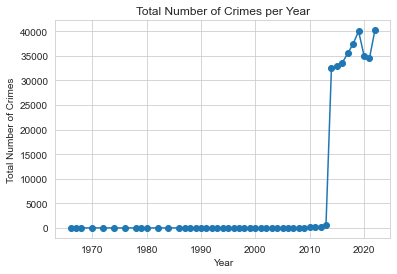

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load dataset
crime_data = pd.read_csv("/Users/biniam/Desktop/Final Pythone Project/major-crime-indicators.csv")

# Prepare the dataset
crime_data["OCC_YEAR"] = pd.to_datetime(crime_data["OCC_DATE"]).dt.year

# Group the data by year and count the total number of crimes
yearly_crimes = crime_data.groupby("OCC_YEAR")["MCI_CATEGORY"].count().reset_index()
yearly_crimes.columns = ["Year", "Total_Crimes"]

# Calculate the correlation coefficient
corr_coef, _ = pearsonr(yearly_crimes["Year"], yearly_crimes["Total_Crimes"])
print(f"Correlation coefficient: {corr_coef:.2f}")

# Create a visualization
sns.set_style("whitegrid")
plt.plot(yearly_crimes["Year"], yearly_crimes["Total_Crimes"], marker='o')
plt.xlabel("Year")
plt.ylabel("Total Number of Crimes")
plt.title("Total Number of Crimes per Year")

# Save the plot as an HTML file
pio.write_html(fig, file='crime_counts_toronto.html')

plt.show()

# Crime Trends Over the Years

### This analysis examines the relationship between the year and the total number of crimes using the major crime indicators dataset. The aim is to understand whether crime has been increasing or decreasing over the years. The key findings of this analysis are as follows:

### Correlation Coefficient: A positive correlation coefficient indicates an increase in crime over the years, while a negative correlation coefficient suggests a decrease in crime.

### An upward trend in the plot suggests an increase in crime over the years, while a downward trend indicates a decrease in crime.


### The visualization above displays the total number of crimes per year, providing insights into the overall trend of crime rates over time.

# Conclusion 

## In conclusion, this project aimed to analyze and visualize crime data in Toronto from 2016 to 2022. We explored various aspects of crime, such as correlations with time, location, and premises type, and identified key trends and patterns. 
## Our findings showed that Assault consistently had the highest number of incidents throughout the two-year period, and Auto Theft showed an increasing trend. 

## Additionally, we created a pie chart to show the crime counts in Toronto per 10,000 incidents and a line chart to display the total number of crimes per year.

## Based on our analysis, we recommend that law enforcement agencies prioritize resources and strategies to address the high incidence of Assault and Auto Theft in Toronto. Furthermore, our analysis highlights the importance of considering the time and location of crime incidents to develop effective crime prevention measures. 

